# Projeto 7: Classificação de roupas

# Etapa 1: Importação das bibliotecas

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras import layers, models

tf.__version__

'2.8.0'

# Etapa 2: Carregamento da base de dados

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
#se estiver no colab
if True:
    fashion_train_df = pd.read_csv('/content/drive/My Drive/fashion-mnist-train.csv', sep = ',')
    fashion_test_df = pd.read_csv('/content/drive/My Drive/fashion-mnist-test.csv', sep = ',')
else:
    fashion_train_df = pd.read_csv('fashion-mnist-train.csv')
    fashion_test_df = pd.read_csv('fashion-mnist-test.csv')

"fashion_train_df = pd.read_csv('fashion-mnist-train.csv')\nfashion_test_df = pd.read_csv('fashion-mnist-test.csv')"

# Etapa 3: Visualização dos dados

In [7]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_train_df.shape

(60000, 785)

In [10]:
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

In [11]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
train.shape

(60000, 785)

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot

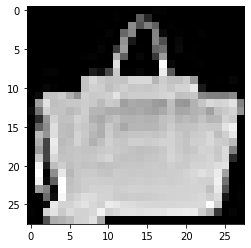

In [13]:
i = random.randint(1, 60000)
#plt.imshow(training[i,1:].reshape((28,28)))
plt.imshow(train[i,1:].reshape((28,28)), cmap='gray');

In [14]:
label = train[i,0]
label

8.0

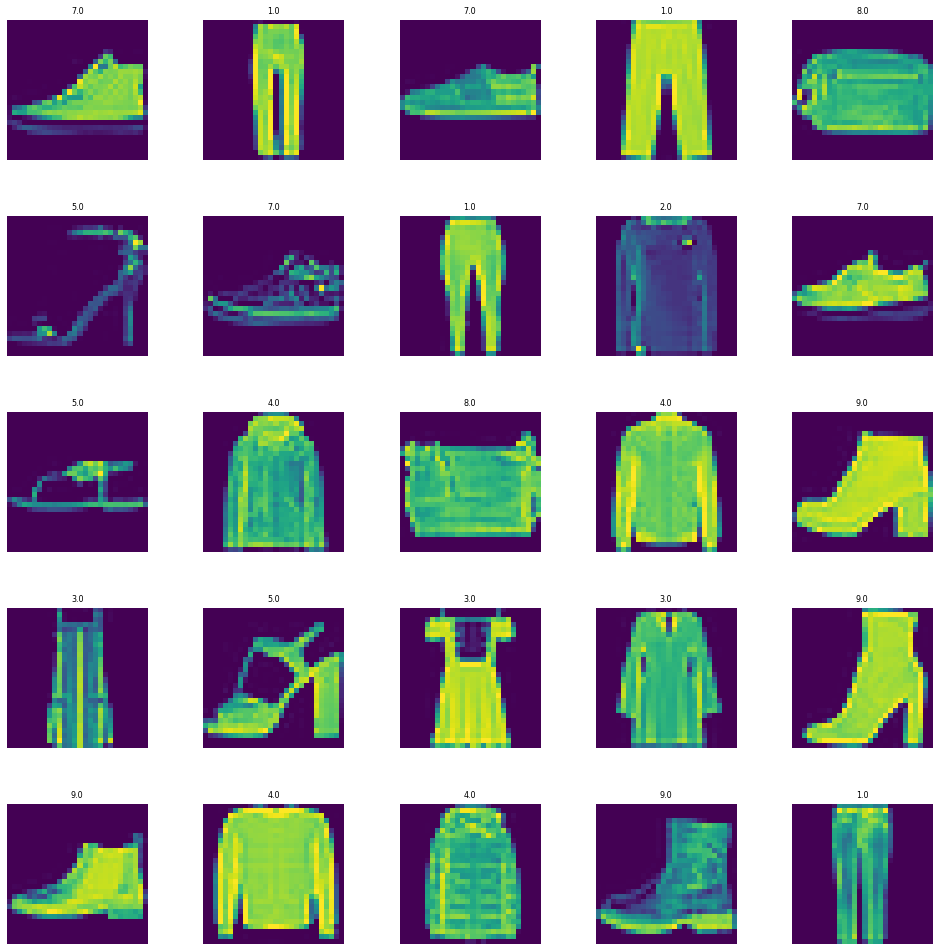

In [15]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_train = len(train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(train[index,1:].reshape((28,28)))
    axes[i].set_title(train[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [16]:
n_train

60000

# Etapa 4: Tratamento da base de dados

In [17]:
X_train = train[:,1:] / 255
y_train = train[:,0]

In [18]:
X_test = test[:,1:] / 255
y_test = test[:,0]

In [19]:
X_train.shape

(60000, 784)

In [20]:
y_train.shape

(60000,)

In [21]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [24]:
X_test.shape

(10000, 28, 28, 1)

# Etapa 5: Construção e treinamento do modelo

In [68]:
cnn = models.Sequential()

#32 detectores com feature detector = 3x3
cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
#maxpooling 2x2 stride = 1
cnn.add(layers.MaxPooling2D(2,2))

#64 detectores com feature detector = 3x3
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
#maxpooling 2x2 stride = 1
cnn.add(layers.MaxPooling2D(2,2))

#64 detectores com feature detector = 3x3
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

#vetorização
cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

#10 neuronios de saida por causa das 10 classes
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [69]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [70]:
epochs = 15
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/15
118/118 [==============================] - 2s 12ms/step - loss: 0.8546 - accuracy: 0.7010
Epoch 2/15
118/118 [==============================] - 1s 11ms/step - loss: 0.4968 - accuracy: 0.8167
Epoch 3/15
118/118 [==============================] - 1s 11ms/step - loss: 0.4173 - accuracy: 0.8499
Epoch 4/15
118/118 [==============================] - 1s 11ms/step - loss: 0.3785 - accuracy: 0.8637
Epoch 5/15
118/118 [==============================] - 1s 11ms/step - loss: 0.3499 - accuracy: 0.8748
Epoch 6/15
118/118 [==============================] - 1s 11ms/step - loss: 0.3319 - accuracy: 0.8808
Epoch 7/15
118/118 [==============================] - 1s 11ms/step - loss: 0.3093 - accuracy: 0.8899
Epoch 8/15
118/118 [==============================] - 1s 11ms/step - loss: 0.2997 - accuracy: 0.8925
Epoch 9/15
118/118 [==============================] - 1s 11ms/step - loss: 0.2865 - accuracy: 0.8971
Epoch 10/15
118/118 [==============================] - 1s 11ms/step - loss: 0.2761 - accura

# Etapa 6: Avaliação do modelo

In [71]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2538 - accuracy: 0.9098


In [72]:
evaluation

[0.2537863254547119, 0.9097999930381775]

In [73]:
#predicted_classes = cnn.predict_classes(X_test) -- Atualizado: 17/01/22

In [74]:
predict_x=cnn.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)

In [75]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [76]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

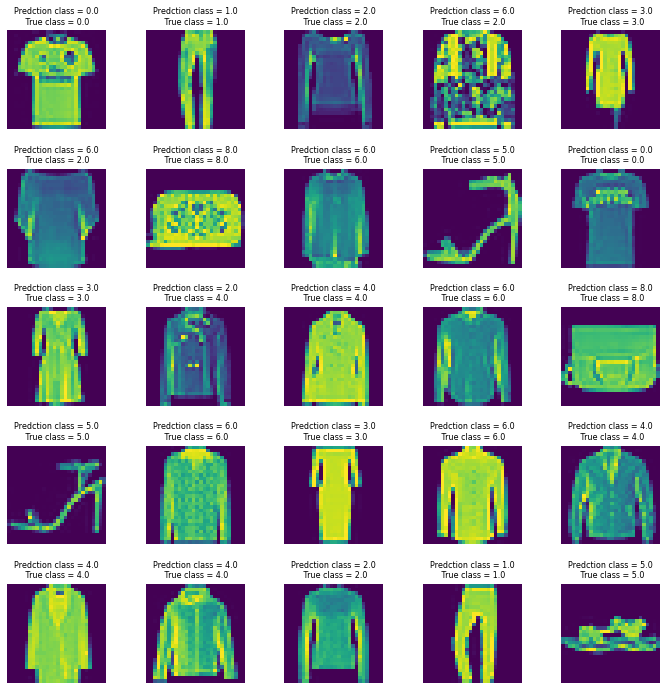

In [77]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title("Predction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

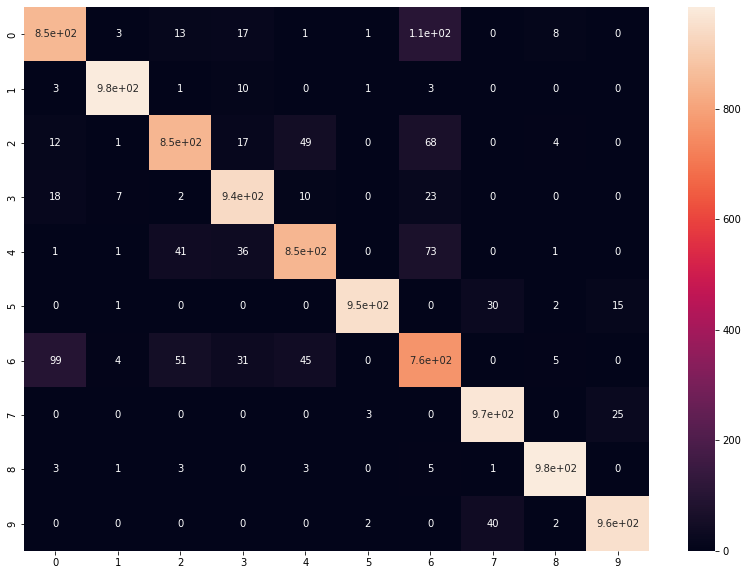

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [79]:
cm

array([[851,   3,  13,  17,   1,   1, 106,   0,   8,   0],
       [  3, 982,   1,  10,   0,   1,   3,   0,   0,   0],
       [ 12,   1, 849,  17,  49,   0,  68,   0,   4,   0],
       [ 18,   7,   2, 940,  10,   0,  23,   0,   0,   0],
       [  1,   1,  41,  36, 847,   0,  73,   0,   1,   0],
       [  0,   1,   0,   0,   0, 952,   0,  30,   2,  15],
       [ 99,   4,  51,  31,  45,   0, 765,   0,   5,   0],
       [  0,   0,   0,   0,   0,   3,   0, 972,   0,  25],
       [  3,   1,   3,   0,   3,   0,   5,   1, 984,   0],
       [  0,   0,   0,   0,   0,   2,   0,  40,   2, 956]])

In [80]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [81]:
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.85      0.86      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.88      0.85      0.87      1000
     Class 3       0.89      0.94      0.92      1000
     Class 4       0.89      0.85      0.87      1000
     Class 5       0.99      0.95      0.97      1000
     Class 6       0.73      0.77      0.75      1000
     Class 7       0.93      0.97      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

